Author : MUHAMMAD DHONI APRIYADI
NIM : 120450111
Affiliation : Sains Data ITERA
Program Description : NON Linear Pendulum

In [1]:
#Author : MUHAMMAD DHONI APRIYADI
#NIM : 120450111
#Affiliation : Sains Data ITERA
#Program Description : Simple Football Game
def euler_(t,h,y,dy,func):
    d2y = func(t,y,dy)
    y_next = y + (h * dy)
    dy_next = dy + (h * d2y)
    return ( y_next, dy_next )

In [2]:
def euler_cromer_(t,h,y,dy,func):
    d2y = func(t, y, dy)
    dy_next = dy + (h * d2y)
    y_next = y + (h * dy_next)

    return (y_next, dy_next)

In [5]:
# Euler Method
def cauchy_euler(params,Func):
    # Initial Condition
    t0 = params['t0']
    t_akhir = params['t_akhir']
    h = params['h']
    y0 = params['y0']
    dy0 = params['dy0']

    res_euler_ = []
    t = []
    step = int((t_akhir - t0) / h)

    for i in range(step):
        tm = (i + 1) * h
        (y_next, dy_next) = euler_(tm, h, y0, dy0, Func)
        res_euler_.append(y_next)
        t.append(tm)
        y0 = y_next
        dy0 = dy_next

    return (t,res_euler_)

def cauchy_eulercromer(params,Func):
    # Initial Condition
    t0 = params['t0']
    t_akhir = params['t_akhir']
    h = params['h']
    y0 = params['y0']
    dy0 = params['dy0']

    res_euler_cromer_ = []
    t = []
    step = int((t_akhir - t0) / h)

    for i in range(step):
        tm = (i + 1) * h
        (y_next, dy_next) = euler_cromer_(tm, h, y0, dy0, Func)
        res_euler_cromer_.append(y_next)
        t.append(tm)
        y0 = y_next
        dy0 = dy_next
    return (t, res_euler_cromer_)

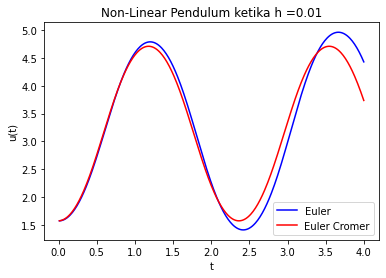

In [8]:
# MAIN 1 Program

from math import *
import matplotlib.pyplot as plt

g = 9.81                                    
l = 1                                       
k = 0                                       
u0 = 0.5 * pi
du0 = 0
t0 = 0
t_akhir = 4
h = 0.01
w0 = g/l

def function(t,u,du):
    return w0 * sin(u) -k*du

res_euler_ = []
res_eulercromer_ = []
t = []
step_ = int((t_akhir - t0) / h)

for i in range(step_):
    tm = (i + 1) * h
    (u_nxt, du_nxt) = euler_(tm, h, u0, du0, function)
    res_euler_.append(u_nxt)
    t.append(tm)
    u0 = u_nxt
    du0 = du_nxt

t = []
u0 = 0.5 * pi
du0 = 0
d2u0 = function(t0,u0,du0)

for i in range(step_):
    tm = (i + 1) * h
    (u_nxt, du_nxt) = euler_cromer_(tm, h, u0, du0, function)
    res_eulercromer_.append(u_nxt)
    t.append(tm)
    u0 = u_nxt
    du0 = du_nxt

plt.title('Non-Linear Pendulum ketika h =0.01')
plt.plot(t,res_euler_,color='b', label = 'Euler')
plt.plot(t,res_eulercromer_,color='r', label = 'Euler Cromer')
plt.xlabel('t')
plt.ylabel('u(t)')
plt.legend()

plt.show()

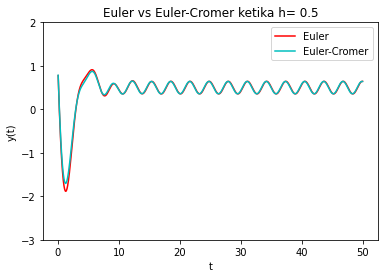

In [9]:
#Main 2 Program

def function(t,y,dy):
    return (-1 *y) + (-1 * dy) + sin(t)**2

res_euler = []
res_eulercromer = []
t = []

params = {
    't0' : 0,
    "t_akhir" : 50,
    "h" : 5 * 10**-2,
    "y0" : 1,
    "dy0" : -9/2
}

(t,res_euler_) = cauchy_euler(params,function)
plt.plot(t,res_euler_,color='r',label = 'Euler ')

(t,res_eulercromer_) = cauchy_eulercromer(params,function)
plt.plot(t,res_eulercromer_,color='c',label = 'Euler-Cromer')
plt.title('Euler vs Euler-Cromer ketika h= 0.5')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.ylim(-3,2)
plt.legend()



plt.show()